# Общий финансовый анализ

В прошлой статье я привел информацию о том, как можно получить данные по финансовым инструментам. Дальше я хочу опубликовать несколько статей о том, что первоначально можно делать с полученными данными, как проводить анализ и составлять стратегию. Материалы составлены на основании публикаций из иностранных источников и курсах на одной из онлайн платформе.
Дальше я рассмотрю как рассчитывать доходность, один из простых индикаторов, волатильность и применять метод наименьших квадратов (OLS).

In [1]:
#Загружаю библиотеки

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [167]:
sber = yf.download('SBER.ME','2015-01-01')

[*********************100%***********************]  1 of 1 downloaded


### Доходность.
Данное значение представляет собой величину процентного изменения стоимости акции за один торговый день. Оно не учитывает дивиденды и комиссии. Его легко рассчитать используя функцию pct_change () из пакета Pandas. Анализ буду проводить на акциях Сбербанка.

In [168]:
# Получаем скорректированую цену закрытия`
daily_close = sber[['Adj Close']]

# Дневная доходность
daily_pct_change = daily_close.pct_change()

# Заменить NA значения на 0
daily_pct_change.fillna(0, inplace=True)

# Проверим дневную доходность 
print(daily_pct_change.head())

# Дневная лог доходность
daily_log_returns = np.log(daily_close.pct_change()+1)

# Вывести дневную лог доходность
print(daily_log_returns.head())

            Adj Close
Date                 
2015-01-05   0.000000
2015-01-06   0.033931
2015-01-08   0.127141
2015-01-09  -0.039553
2015-01-12  -0.003051
            Adj Close
Date                 
2015-01-05        NaN
2015-01-06   0.033368
2015-01-08   0.119685
2015-01-09  -0.040357
2015-01-12  -0.003055


Как правило используют лог доходность, так как она позволяет лучше понять и исследовать изменение доходности с течением времени. 
Чтобы из полученных данных узнать недельную и/или месячную доходность, используют функцию resample().

In [169]:
# Взять у `sber` значения за последний рабочий день месяца
monthly = sber.resample('BM').apply(lambda x: x[-1])

# Вычислить месячную доходность
print(monthly.pct_change().tail())

# Пересчитать `sber` по кварталам и взять среднее значение за квартал
quarter = sber.resample("4M").mean()

# Вычислить квартальную доходность
print(quarter.pct_change().tail())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-12-31  0.074366  0.088713  0.080873  0.088768   0.088768  0.581704
2020-01-31  0.025387  0.012500  0.005743 -0.010010  -0.010010  0.110391
2020-02-28 -0.090909 -0.077932 -0.083951 -0.074703  -0.074703  1.600777
2020-03-31 -0.208511 -0.210167 -0.202381 -0.197763  -0.197763 -0.085101
2020-04-30  0.003226 -0.006781  0.000163 -0.008386  -0.008386 -0.185628
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-01-31 -0.038883 -0.040125 -0.036081 -0.037199  -0.027063 -0.002097
2019-05-31  0.133034  0.130002  0.136752  0.132326   0.132324 -0.141937
2019-09-30  0.053592  0.052010  0.053732  0.053130   0.120105 -0.267354
2020-01-31  0.044429  0.043917  0.046244  0.045761   0.050750 -0.178308
2020-05-31 -0.085863 -0.078696 -0.098567 -0.090497  -0.090497  1

Использование pct_change () представляет удобство, но в свою очередь скрывает то, как происходит вычисление. В качестве альтернативы можно использовать функцию shift() из пакета Pandas.  Более точнее – дневная цена закрытия делится на прошлую (сдвинутую на один) цены и из полученного значения вычитается единица. Но есть один незначительный минус – первое значение в результате получается NA.  

Расчет доходности основан на формуле

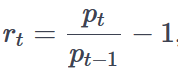

Где, p – цена, t – момент времени и r – доходность
Дальше построим диаграмму распределения доходности и рассчитаем основную статистику:

In [170]:
# Дневная доходность
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Напечатать дневную доходность
print(daily_pct_change.head())

            Adj Close
Date                 
2015-01-05        NaN
2015-01-06   0.033931
2015-01-08   0.127141
2015-01-09  -0.039553
2015-01-12  -0.003051


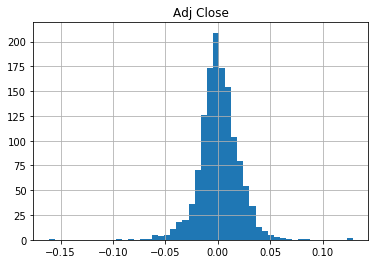

         Adj Close
count  1318.000000
mean      0.001239
std       0.019655
min      -0.161416
25%      -0.009140
50%       0.000591
75%       0.011892
max       0.128986


In [171]:
# Построить диаграмму `daily_pct_c`
daily_pct_change.hist(bins=50)

# Показать диаграмму
plt.show()

# Вывести общую статистику
print(daily_pct_change.describe())

Распределение выглядит очень симметрично и нормально распределённым вокруг значения 0,00. Для получения других значений статистики используется функция description (). В результате видно, что среднее значение немного больше нуля, а стандартное отклонение составляет практически 0,02

In [172]:
# Вычислить кумулютивную дневную доходность
cum_daily_return = (1 + daily_pct_change).cumprod()

# Напечатать
print(cum_daily_return.tail())

            Adj Close
Date                 
2020-03-30   3.905250
2020-03-31   3.995092
2020-04-01   3.943235
2020-04-02   3.989543
2020-04-03   3.961588


Кумулятивная дневная прибыль полезна для определения стоимости инвестиций через определенные промежуток времени. Ее можно рассчитать, как приводиться в коде ниже. Так же в plot() устанавливается размер графика при помощи figsize. 

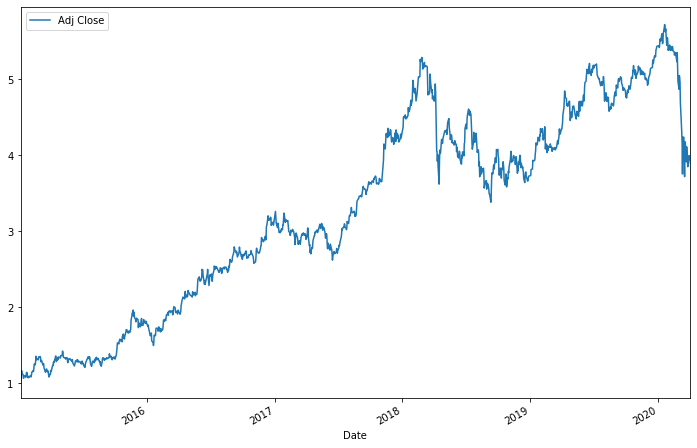

In [173]:
# Построить куммулютивную дневную доходность
cum_daily_return.plot(figsize=(12,8))

# Показать график
plt.show()

Как делал раньше, пересчитаю доходность в месячном периоде:

In [174]:
# вычисляю месячную куммулютивную доходность
cum_monthly_return = cum_daily_return.resample("M").mean()

# Ввожу ее на печать
print(cum_monthly_return.tail())

            Adj Close
Date                 
2019-12-31   5.161189
2020-01-31   5.542648
2020-02-29   5.347777
2020-03-31   4.234965
2020-04-30   3.964789


Знание того, как рассчитать доходность, - ценное познание. Но часто эти значения не очень много говорят без сравнения между различными акциями. 

Проведу теперь сравнение доходностей различных акций.

In [175]:
ticker = ['AFLT.ME','DSKY.ME','IRAO.ME','PIKK.ME', 'PLZL.ME','SBER.ME','ENRU.ME','IMOEX.ME', 'RBCM.ME']

In [176]:
stock = yf.download(ticker,'2015-01-01')

[*********************100%***********************]  9 of 9 downloaded


In [177]:
stock.head()

Adj Close                                                           \
             AFLT.ME DSKY.ME ENRU.ME IMOEX.ME IRAO.ME PIKK.ME PLZL.ME RBCM.ME   
Date                                                                            
2015-01-05     27.11     NaN  0.4571      NaN    0.63  169.27  822.66   3.635   
2015-01-06     27.00     NaN  0.4438      NaN    0.63  175.63  860.89   3.790   
2015-01-08     28.71     NaN  0.4426      NaN    0.63  168.83  871.58   3.875   
2015-01-09     27.76     NaN  0.4505      NaN    0.63  170.15  863.35   4.045   
2015-01-12     28.13     NaN  0.4511      NaN    0.63  166.00  838.69   3.885   

                     Close  ...    Open   Volume                            \
           SBER.ME AFLT.ME  ... SBER.ME  AFLT.ME DSKY.ME  ENRU.ME IMOEX.ME   
Date                        ...                                              
2015-01-05   46.86   33.21  ...   54.02   982201     NaN   136000      NaN   
2015-01-06   48.45   33.07  ...   56.00   768000     NaN  1582000      NaN   
2015-01-08   54.61   35.17  ...   59.00  3377000     NaN  3240000      NaN   
2015-01-09   52.45   34.00  ...   65.70  4286300     NaN  1387000      NaN   
2015-01-12   52.29   34.45  ...   62.20  2852900     NaN   374000      NaN   

                                                        
           IRAO.ME PIKK.ME PLZL.ME  RBCM.ME    SBER.ME  
Date                                                    
2015-01-05       0   28390    2061   102800   63231040  
2015-01-06       0  129590   17184   394600   70269700  
2015-01-08       0   30850   11807   509400  187598890  
2015-01-09       0   18260    9586  1203300  107559890  
2015-01-12       0   49370   18642   377500   99437131  

[5 rows x 54 columns]

Используя полученные данные, можно построить диаграмму:

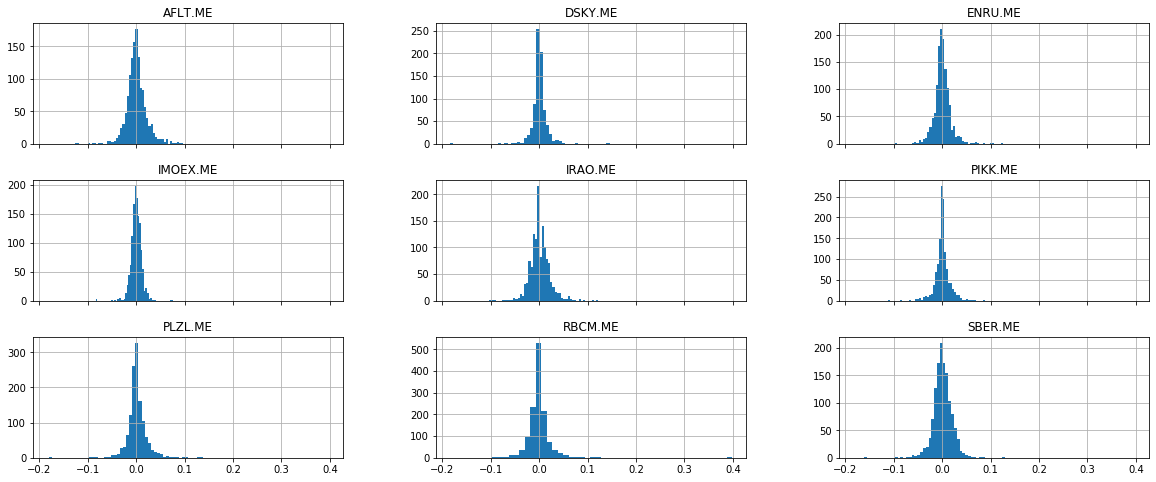

In [178]:
# Вычислить дневную доходность в `daily_close_px`
daily_pct_change = stock['Adj Close'].pct_change()

# Построить распределение
daily_pct_change.hist(bins=50, sharex=True, figsize=(20,8))

# Показать результирующий рисунок
plt.show()

Еще один полезный график — это матрица рассеяния. Ее можно легко построить при помощи функции scatter_matrix (), входящей в библиотеку pandas. В качестве аргументов используется  daily_pct_change и устанавливается параметр Ядерной оценки плотности - Kernel Density Estimation. Кроме того, можно установить прозрачность с помощью параметра alpha и размер графика с помощью параметра figsize.

In [179]:
from pandas.plotting import scatter_matrix

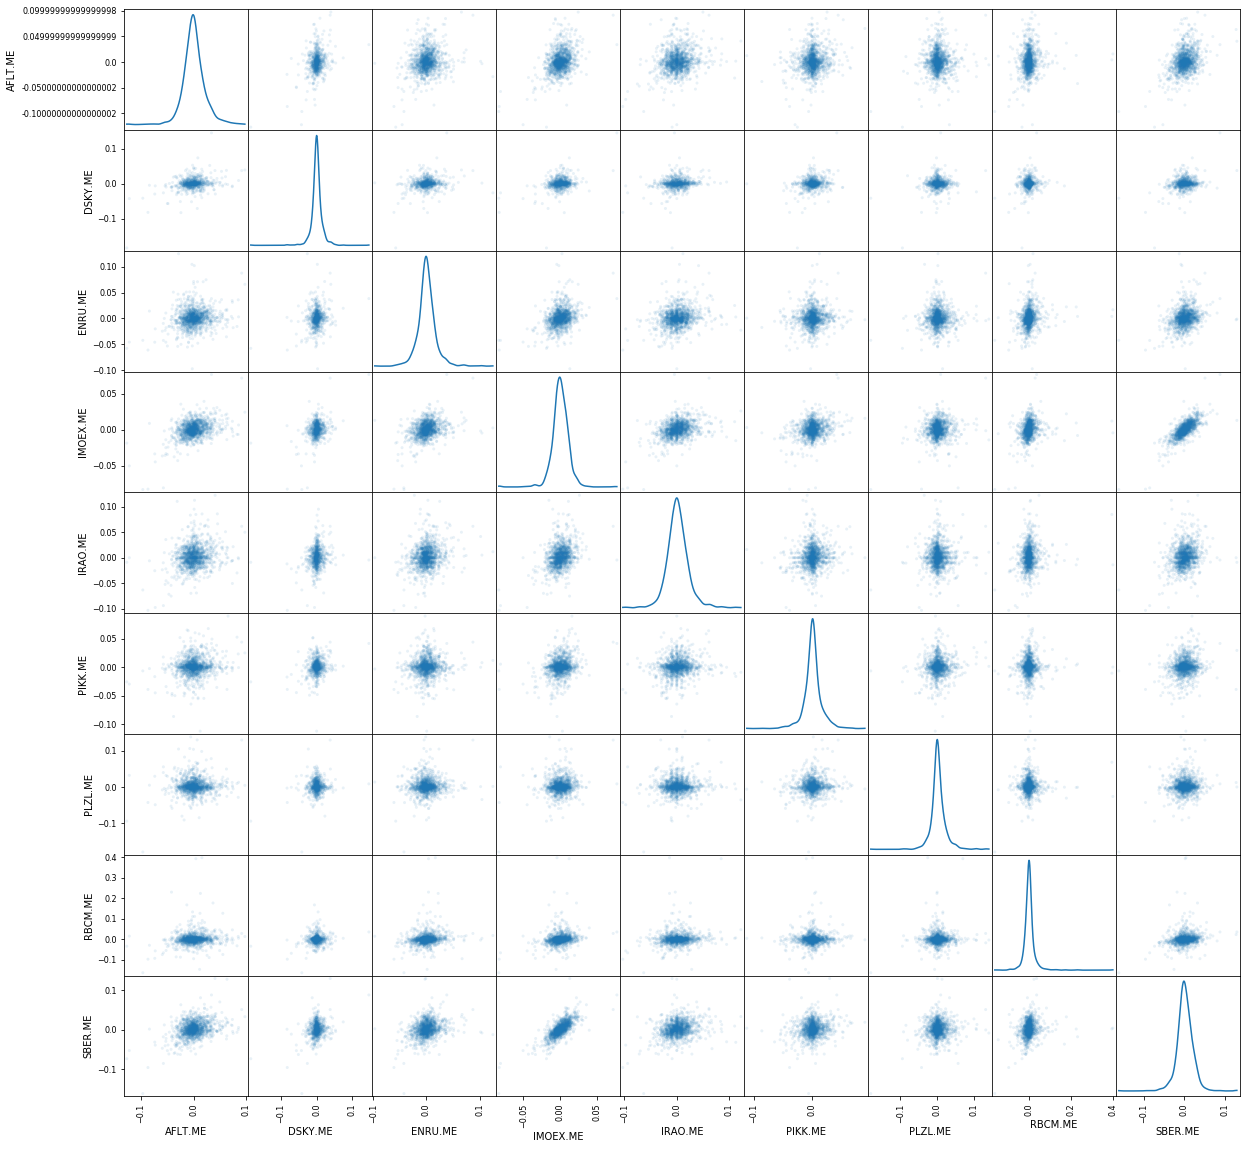

In [180]:
# Построить матрицу рассеивания `daily_pct_change` data 
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(20,20))

# Вывести на печать
plt.show()

### Скользящее окно расчетов

В пакете pandas присутствует скользящее окно расчетов. Смысл его – с каждым новым значением функция пересчитывается за заданный период времени. Их большое [количество](http://pandas.pydata.org/pandas-docs/version/0.17.0/api.html#standard-moving-window-functions). Для примера: rolling_mean(), rolling_std(), которые чаще всего и используют при анализе движения акций. rolling_mean() - это обычная скользящая средняя, которая сглаживает краткосрочные колебания и позволяет визуализировать общую тенденцию.

In [181]:
# Выделяю скорректированную цену закрытия 
adj_close_px = sber['Adj Close']

# Вычисляю скользящую среднию
moving_avg = adj_close_px.rolling(window=40).mean()

# Вывожу результат
print(moving_avg[-10:])

Date
2020-03-23    233.93450
2020-03-24    232.11325
2020-03-25    230.43225
2020-03-26    228.69150
2020-03-27    226.70250
2020-03-30    224.84475
2020-03-31    223.22000
2020-04-01    221.48975
2020-04-02    219.77850
2020-04-03    218.03950
Name: Adj Close, dtype: float64


Дальше построим график, чтоб лучше понять то, что получается в результате работы данной функции:

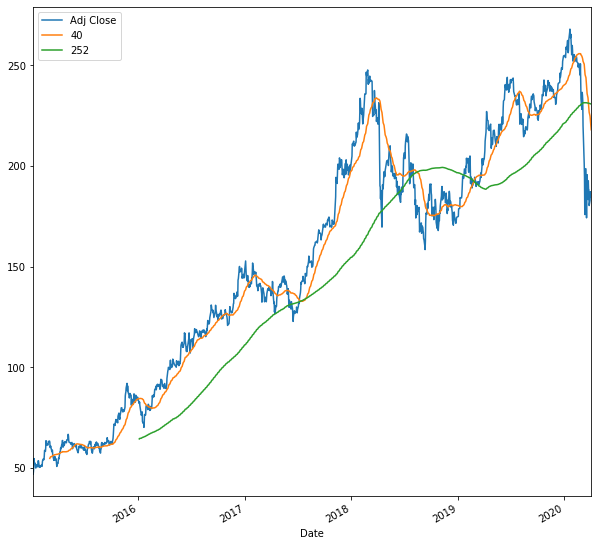

In [182]:
# Вычисление короткой скользящей средней
sber['40'] = adj_close_px.rolling(window=40).mean()

# Вычисление длинной скользящей средней
sber['252'] = adj_close_px.rolling(window=252).mean()

# Построение полученных значений
sber[['Adj Close', '40', '252']].plot(figsize=(10,10))

# SПоказать рисунок
plt.show()

Как видно приведенная функция справлется с поставленной задачей. Она сглаживает краткосрочные колебания и позволяет увидеть долгосрочный тренд.

### Вычисление волатильности

Волатильность акций - это изменение дисперсии доходности акций в течение определенного периода времени. Обычно сравнивают волатильность одной акции с другой, чтобы получить представление о том, какая может иметь меньший риск, или с рыночным индексом, чтобы понять волатильность акций относительно рынка. Как правило, чем выше волатильность, тем рискованнее инвестиции в эту акцию. Необходимо отметить, что она не является постоянной и изменяется с течением времени. Это можно увидеть опять же при помощи фунции rolling ()

In [183]:
daily_log_returns = np.log(daily_pct_change+1)

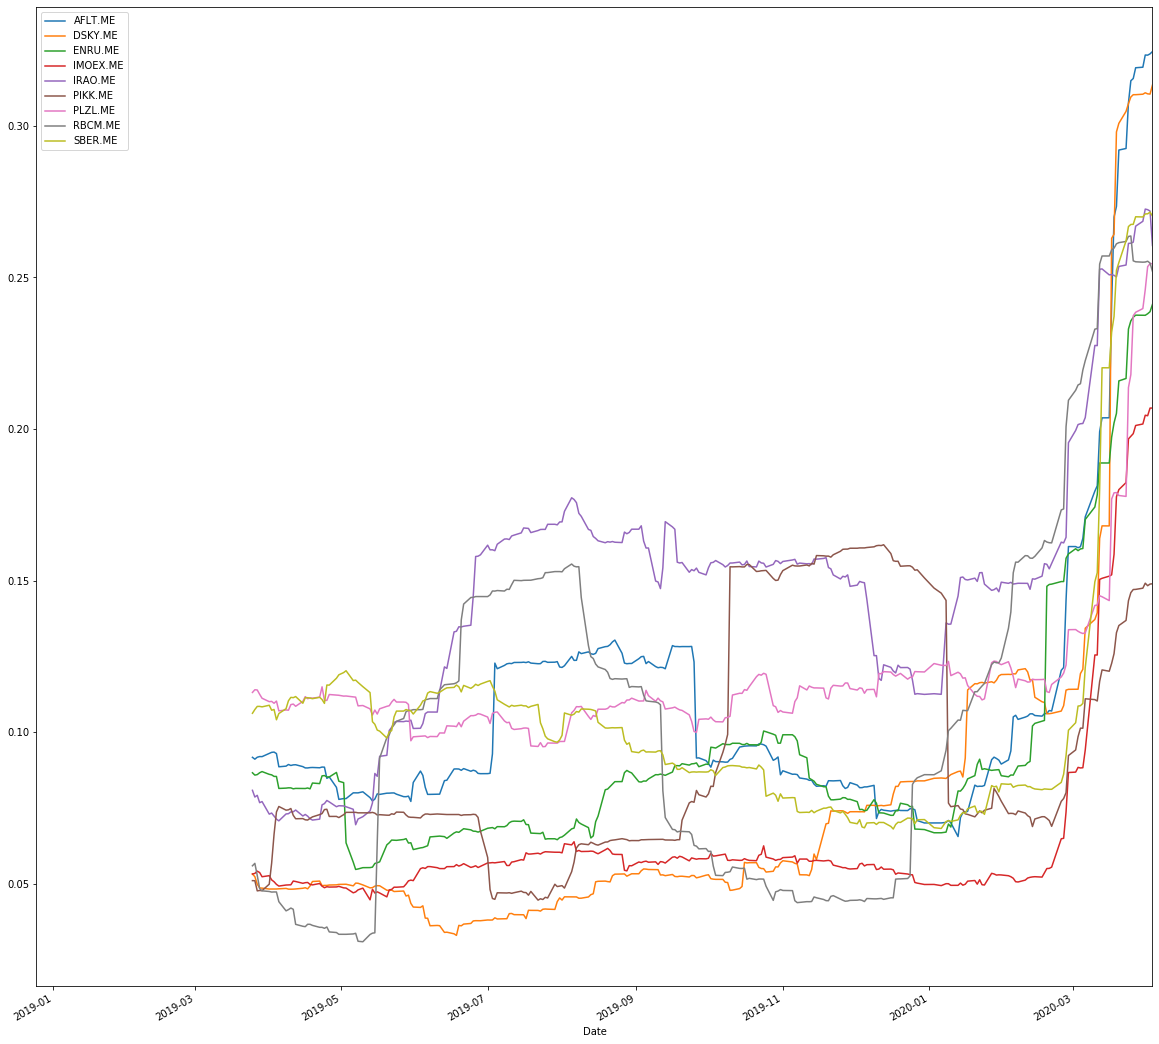

In [184]:
# Определяю рассматриваем период
min_periods = 60 

# Вычисляю волатильность
vol = daily_log_returns[1000:].rolling(min_periods).std() * np.sqrt(min_periods) 

# Строю волатильность
vol.plot(figsize=(20, 20))

# Вывожу рисунок
plt.show()

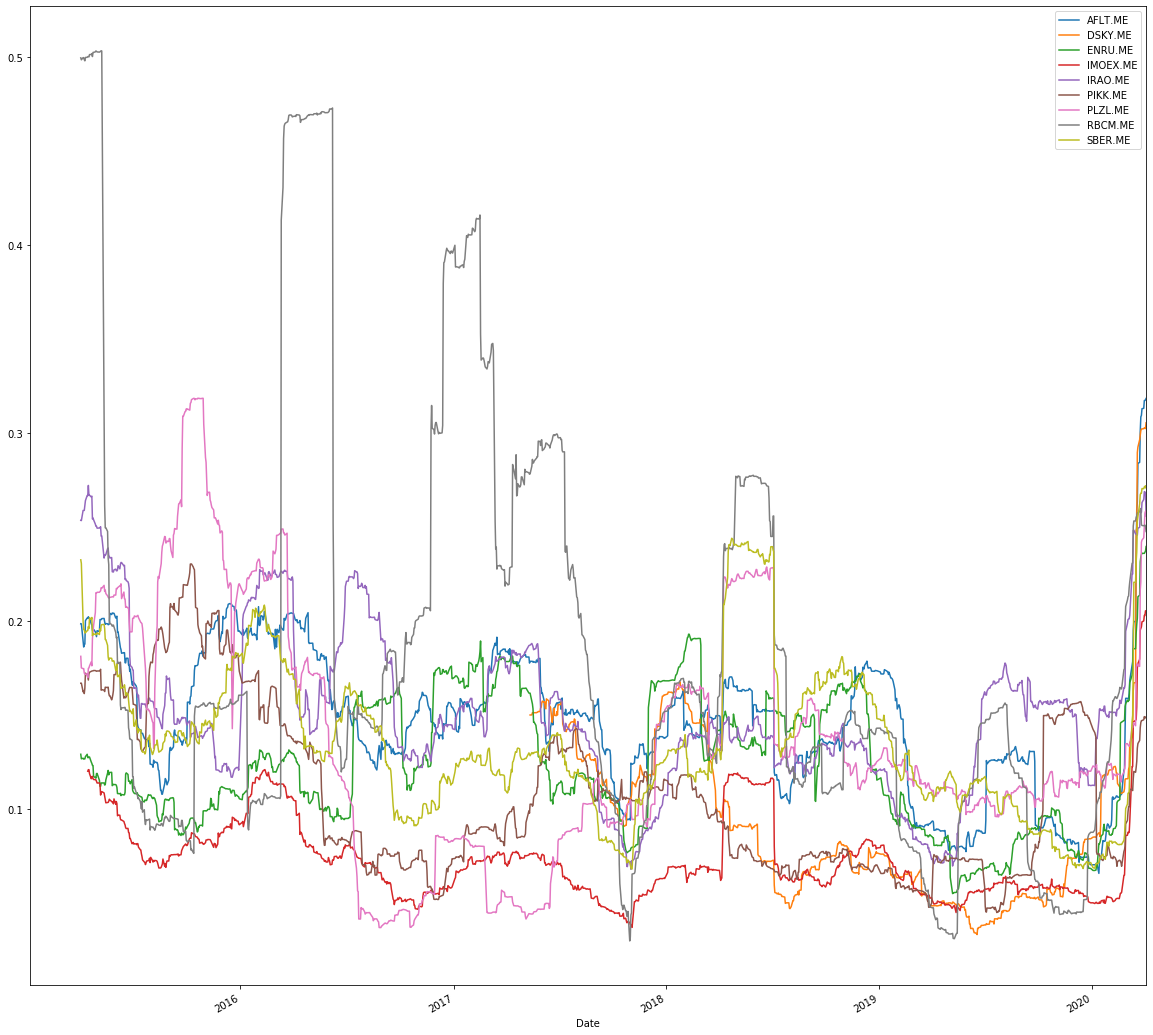

In [185]:
# Определяю рассматриваем период
min_periods = 60 

# Вычисляю волатильность
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Строю волатильность
vol.plot(figsize=(20, 20))

# Вывожу рисунок
plt.show()

### Обычный метод наименьших квадратов

После всех вышеприведенных вычислений можно углубиться в статистический анализ и использовать для анализа метод наименьших квадратов. 

Для этого используется библиотека statsmodels, которая позволяет пользователям исследовать данные, оценивать статистические модели и выполнять статистические тесты. Глубоко в тему и темины погружаться не будем, и за основу возьмем эту [статью](https://datatofish.com/statsmodels-linear-regression/) и эту [статью](https://medium.com/python-data/capm-analysis-calculating-stock-beta-as-a-regression-in-python-c82d189db536). Само описание исполььзуемой функции на английском доступно на следующей [сайте](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html). Если специалисты в области статистики, анализа данных, финансисты и иные посчитают необходимым что-то добавить, то обязательно пишите в комментариях. 

#### О линейной регрессии

Линейная регрессия используется в качестве прогнозирующей модели, когда предполагается линейная зависимость между зависимой переменной (переменная, которую мы пытаемся предсказать) и независимой переменной (переменная и/или переменные, используемые для предсказания).

В самом простой случае при рассмотрение используется одна переменная, но основании которой мы пытаемся предсказать другую. Формула в этом случае имеет следующую струтуру:

**Y = C + M*X**

* Y = зависимая переменная (результат / прогноз / оценка)
* C = Константа (Y-Intercept)
* M = Наклон линии регрессии (угловой коэффициент или градиент оценённой линии; она представляет собой величину, на которую Y увеличивается в среднем, если мы увеличиваем X на одну единицу)
* X = независимая переменная (предиктор, используемый в прогнозе Y)

В действительности так же может существовать связь между зависимой переменной и несколькими независимыми переменными. Для этих типов моделей (при условии линейности) мы можем использовать множественную линейную регрессию со следующей структурой:

**Y = C + M1*X1 + M2*X2 + …**

#### Бета - коэффициент

Про данный коэффициент написано уже много, для примера на этой [странице](https://smart-lab.ru/finansoviy-slovar/beta)

Коротко, если не вдаваться в подробности, то можно его охарактеризовать следующим образом:

Акции c бета-коэффициентом:

* ноль указывает на отсутствие корреляции между акцией и индексом
* единица указывает на то, что акция имеет ту же волатильность, что и индекс
* больше одного - указывает на большую доходность (а следовательно и риски) акции, чем индекс
* менее единицы - менее волатильная акция, чем индекс

Другими словами, если акция увеличится на 14%, в то время как рынок вырос всего на 10%, то бета-коэффициент акции составит 1,4. Как правило на рынках с более высоким бета-коэффициентом можно предположить лучшие условия для вознаграждения (а следовательно и для риска).

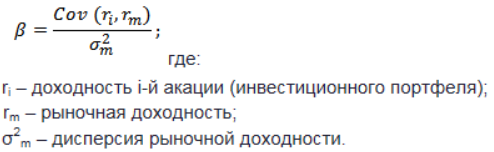

#### Пример

Если Вы читали прошлую статью, то я там ввел в расчет индекс Московской биржи 'IMOEX.ME'. Будем его считать как зависимую переменную, а данные по остальным акциям - независимые.

In [186]:
stock[['Adj Close']].head()

Adj Close                                                           \
             AFLT.ME DSKY.ME ENRU.ME IMOEX.ME IRAO.ME PIKK.ME PLZL.ME RBCM.ME   
Date                                                                            
2015-01-05     27.11     NaN  0.4571      NaN    0.63  169.27  822.66   3.635   
2015-01-06     27.00     NaN  0.4438      NaN    0.63  175.63  860.89   3.790   
2015-01-08     28.71     NaN  0.4426      NaN    0.63  168.83  871.58   3.875   
2015-01-09     27.76     NaN  0.4505      NaN    0.63  170.15  863.35   4.045   
2015-01-12     28.13     NaN  0.4511      NaN    0.63  166.00  838.69   3.885   

                    
           SBER.ME  
Date                
2015-01-05   46.86  
2015-01-06   48.45  
2015-01-08   54.61  
2015-01-09   52.45  
2015-01-12   52.29

Целью здесь является прогнозирование / оценка значения фондового индекса на основе семи переменных - доходности по акциям.

#### Код на Python с использованием пакета statsmodels

Следующий код Python включает в себя пример линейной регрессии, где входной переменной является доходность по Индексу МосБиржи, а оцениваемая переменная - доходность по акциям Аэрофлот. 

Вот полный синтаксис для выполнения линейной регрессии в Python с использованием statsmodels:

In [2]:
ticker = ['AFLT.ME','IMOEX.ME']

In [3]:
stock = yf.download(ticker)

[*********************100%***********************]  2 of 2 downloaded


In [4]:
# Импорт `statsmodels` как `sm`
import statsmodels.api as sm

# Выделение скорректированой цены закрытия
all_adj_close = stock[['Adj Close']]

# Вычисление доходности 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Выделение доходности по акциям  
aflt_returns = all_returns['Adj Close'][['AFLT.ME']].fillna(0)

# Выделение доходности по индексу МосБиржи 
moex_returns = all_returns['Adj Close'][['IMOEX.ME']].fillna(0)


# Создание нового DataFrame с доходностями акций

return_data = pd.concat([aflt_returns, moex_returns], axis=1)[1:]
return_data.columns = ['AFLT.ME', 'IMOEX.ME']


# Добовляем столбец единиц и определяем X и y
X = sm.add_constant(return_data['IMOEX.ME'])
y = return_data['AFLT.ME']


# Construct the model
model_moex = sm.OLS(y,X).fit()

# Print the summary
print(model_moex.summary())

                            OLS Regression Results                            
Dep. Variable:                AFLT.ME   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     407.9
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.50e-84
Time:                        12:29:06   Log-Likelihood:                 6296.9
No. Observations:                2517   AIC:                        -1.259e+04
Df Residuals:                    2515   BIC:                        -1.258e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.075e-05      0.000      0.229      0.8

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


На сайте yahoo и проверка на сайте Мосбиржи, показали, что бета коэффициент отличается незначительно в большую стороны. Но надо честно признаться, что расчет для некоторых других акций с российской биржи показал более значительные отличия. 

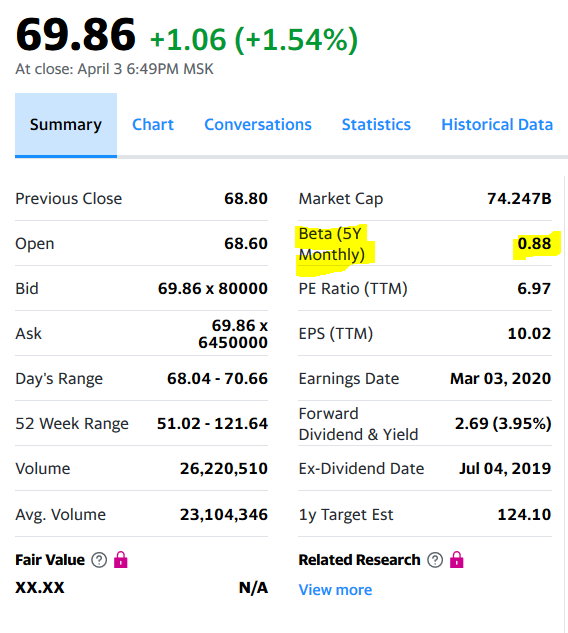

Проверим на акции FB в сравнение с индексом SP500.

In [190]:
sp_500 = yf.download('^GSPC')
fb = yf.download('FB')

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [191]:
# Взять у `sber` значения за последний рабочий день месяца
fb = fb.resample('BM').apply(lambda x: x[-1])
sp_500 = sp_500.resample('BM').apply(lambda x: x[-1])

In [192]:
# joining the closing prices of the two datasets 
monthly_prices = pd.concat([fb['Close'], sp_500['Close']], axis=1)
monthly_prices.columns = ['FB', '^GSPC']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

            FB  ^GSPC
Date                 
1927-12-30 NaN  17.66
1928-01-31 NaN  17.57
1928-02-29 NaN  17.26
1928-03-30 NaN  19.28
1928-04-30 NaN  19.75
                  FB     ^GSPC
Date                          
2012-06-29  0.050676  0.039555
2012-07-31 -0.301929  0.012598
2012-08-31 -0.168125  0.019763
2012-09-28  0.199336  0.024236
2012-10-31 -0.025392 -0.019789


In [193]:
# split dependent and independent variable
X = clean_monthly_returns['^GSPC']
y = clean_monthly_returns['FB']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model_fb_sp_500 = sm.OLS(y, X1)

# fit model and print results
results_fb_sp_500 = model_fb_sp_500.fit()
print(results_fb_sp_500.summary())

                            OLS Regression Results                            
Dep. Variable:                     FB   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     13.54
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           0.000391
Time:                        17:49:03   Log-Likelihood:                 87.012
No. Observations:                  95   AIC:                            -170.0
Df Residuals:                      93   BIC:                            -164.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0148      0.010      1.440      0.1

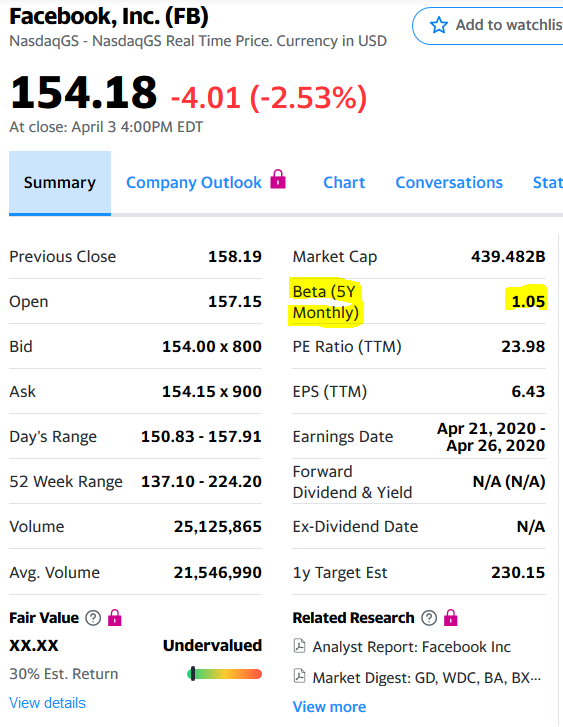

В этом случае все совпало и подтвердило возможность использование statsmodels для определение коэффициента бэта.

Ну и в качестве бонуса - если Вы хотите получить только бета - коэффициентт и остальную статистику вы хотите оставить в стороне, то предлагается еще один код для его расчета:

In [194]:
# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope)

1.0568997978702754


Правда это не означает, что всю остальные получаемые значения надо игнорировать, но для их понимания понадобятся знания статистики. Приведу небольшую выдержку из получаемых значений:

* R-squared, который является коэффициентом детерминации и принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость; 
* Adj. R-squared - скорректированный R-squared на основании числа наблюдений и числа степеней свободы;
* std err - стандартная ошибка оценки коэффициента;
* P>|t| - р-значение Величина менее 0,05 считается статистически значимой;
* 0.025 и 0.975 - нижнее и верхнее значения доверительного интервала.
* и т.д.

На этом пока что все. Конечно представляет интерес поискать зависимость между различными величинами для того, что-бы через одну предсказать другую и получить профит. В одном из иностранных [источников](https://programmingforfinance.com/2018/01/predicting-stock-prices-with-linear-regression/) встретилось предсказание индекса через процентную ставку и уровень безработицы. Но если изменение процентной ставки в России можно взять с сайта Центробанка, то другие пока продолжаю искать. К сожалению на сайте Росстата не удалось найти актуальные. 

Необходимо обратить внимание, что используется [1:] к IRAO и SBER, чтобы исключить значение NaN, которое может негативно повлиять на построенную модель.  

После проведенного исследования необходимо обратить внимание на следующее:

* Dep. Variable, которая указывает, какая переменная является ответом в полученной модели
* Model - в данном случае OLS. Это модель, которую вы используете для подгонки.
* Кроме того указано в Method как были рассчитаны параметры полученной модели. В этом случае - Наименьшие квадраты (Least Squares).

Помимо того есть иные интересные полученные значения:

* Количество наблюдений (No. Observations);
* Количество степеней свободы остатков (DF Residuals)
* Количество переменных в модели указано в DF Model. Ответ, указанный в Dep. Variable не учитывается. 

Теперь необходимо рассмотреть правую колонку, которая более детально показывает как хороша подгонка была произведена. 

* R-squared, который является коэффициентом детерминации. Коэффициент детерминации для модели с константой принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50%. Модели с коэффициентом детерминации выше 80% можно признать достаточно хорошими. Равенство коэффициента детерминации единице означает, что объясняемая переменная в точности описывается рассматриваемой моделью.
* Adj. R-squared - скорректированный R-squared на основании числа наблюдений и числа степеней свободы.
* F-statistic - показывает насколько совершенна подгонка. Среднеквадратичная ошибка модели, деленная на среднеквадратичную ошибку остатков.
* Prob (F-statistic) - вероятность того, что получится вышеуказанная статистика, учитывая нулевую гипотезу, что они не связаны
* Log-Likelihood - функция правдоподобия
* AIC -  Akaike Information Criterion.Регулирует логарифмическую вероятность на основе количества наблюдений и сложности модели.
* BIC - Bayesian Information Criterion. Похож на AIC, но имеет более высокий штраф для моделей с большим количеством параметров.

Вторая таблица представляет коэффициенты:

* coef - расчитанное значение коэффициента;
* std err -  стандартная ошибка оценки коэффициента;
* t - pначение t-статистики. Это показатель того, насколько статистически значимым является коэффициент;
* P>|t| - P-значение, которое соответствует нулевой гипотезе о том, что коэффициент = 0 истинен. Если он меньше доверительного уровня, часто 0,05, это указывает на наличие статистически значимой связи между входным параметром и ответом.
* 0.025 и 0.975 - нижнее и верхнее значения 95% доверительного интервала

Наконец, существует несколько статистических тестов для оценки распределения остатков:

* Omnibus - Тест д'Аностино. Он обеспечивает комбинированный статистический тест на наличие асимметрии и эксцесса.
* Prob(Omnibus) - метрика Omnibus превратилась в вероятность.


* Omnibus/Prob(Omnibus) – тест на асимметрию и эксцесс остатка. Желательно увидеть значение близкое к нулю, которое будет указывать на нормальность. Prob (Omnibus) выполняет статистический тест, показывающий вероятность того, что остатки распределены нормально.Здесь желательно число близкое к 1;
* Skew - мера симметрии данных. Здесь желательно видеть что-то близкое к нулю, что будет указывать на нормальность распределения остатков. Данное значение зависит от Omnibus.
* Kurtosis мера "пика", или кривизны данных. Более высокие пики приводят к большему Kurtosis. Большой Kurtosis можно интерпретировать как более плотную группировку остатков около нуля, что подразумевает лучшую модель с небольшим количеством выбросов;
* Durbin-Watson - тесты на гомоскедастичность. Оптимальными являются значения от 1 до 2. 
* Jarque-Bera (JB) / Prob (JB) - как тест Омнибуса проверяет на перекос и эксцесс. Должен подтверждать теста Omnibus;
* Cond. No. - тест на мультиколлинеарность. Желательно небольшое число. В инстранных источниках рекомендуется ниже 30. 

Ниже построем график:

In [195]:
model_moex.params[1]

0.8249813034652231

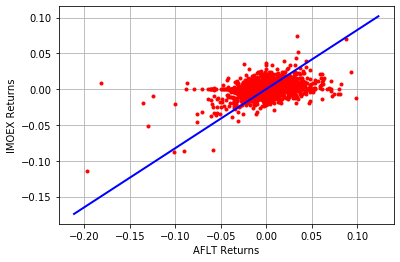

In [196]:
# Построение графиков
plt.plot(return_data['AFLT.ME'], return_data['IMOEX.ME'], 'r.')

# Добавляется ось к графику
ax = plt.axis()

# Инициализация `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Построение регрессионой линии
plt.plot(x, model_moex.params[0] + model_moex.params[1] * x, 'b', lw=2)

# Добавление подписей
plt.grid(True)
plt.axis('tight')
plt.xlabel('AFLT Returns')
plt.ylabel('IMOEX Returns')

# Все построить
plt.show()

In [197]:
monthly_returns.head()

,FB,^GSPC
Date,,
1927-12-30,NaN,NaN
1928-01-31,NaN,-0.005096
1928-02-29,NaN,-0.017644
1928-03-30,NaN,0.117034
1928-04-30,NaN,0.024378


In [203]:
results_fb_sp_500.params[0]

0.014775620814030076

In [202]:
model_moex.params[0]

9.07488602449132e-05

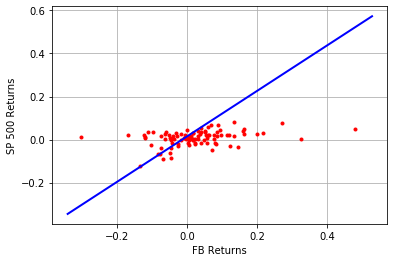

In [204]:
# Построение графиков
plt.plot(clean_monthly_returns['FB'], clean_monthly_returns['^GSPC'], 'r.')

# Добавляется ось к графику
ax = plt.axis()

# Инициализация `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Построение регрессионой линии
plt.plot(x, results_fb_sp_500.params[0] + results_fb_sp_500.params[1] * x, 'b', lw=2)

# Добавление подписей
plt.grid(True)
plt.axis('tight')
plt.xlabel('FB Returns')
plt.ylabel('SP 500 Returns')

# Все построить
plt.show()

Также можно построить скользящую корреляцию.

In [205]:
X = return_data['IMOEX.ME'].fillna(return_data['IMOEX.ME'].mean())
Y = return_data['AFLT.ME']

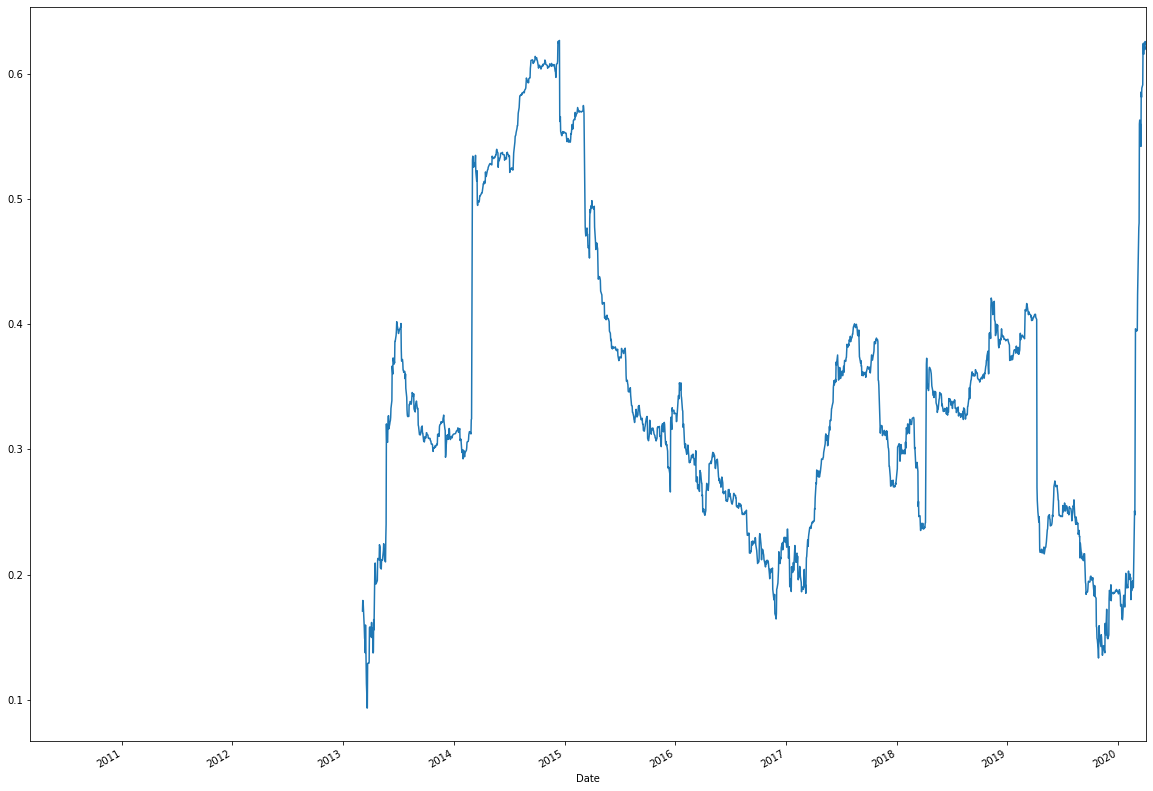

In [206]:
# Построение скользящей корреляции
return_data['AFLT.ME'].rolling(window=252).corr(return_data['IMOEX.ME'].fillna(return_data['IMOEX.ME'].mean())).plot(figsize=(20, 15))

# Выводим
plt.show()

In [ ]:
# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope)

In [208]:
X = return_data['AFLT.ME']
y = return_data['IMOEX.ME']
stats.linregress(X, y)[0]

0.16915801120693896

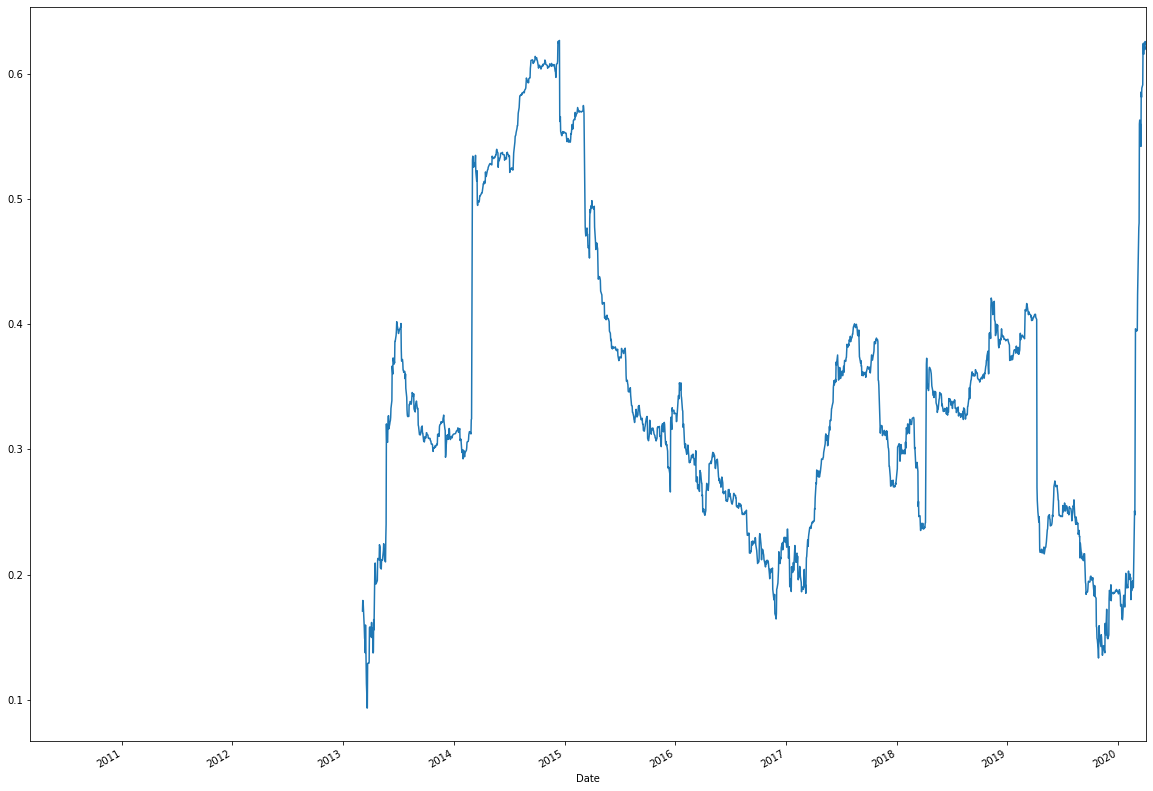

In [206]:
# Построение скользящей корреляции
return_data['AFLT.ME'].rolling(window=252).corr(return_data['IMOEX.ME'].fillna(return_data['IMOEX.ME'].mean())).plot(figsize=(20, 15))

# Выводим
plt.show()